# Signal Classification Models

Author: Ziad - Doaa - Osama (521237)

Review of different models and techniques used for signal classification. The models are implemented in Python and some in MATLAB. 
The methods and models that I have built for the comparison are listed below.
The complete code for the implementation of all the model can be found on their respective files, which are indicated on the description of each section.
<br/>
### Models:
 * **Feature extraction + Classifier**

 * **Automated feature extraction + Classifier**

 * **CNN_1D** (1-dimensional convolutional network)

 * **LSTM** (Long short-term memory neural network)

 * **CNN_1D + LSTM**

 * **CWT + CNN_2D** (Continuous wavelet transform + 2D convolutional network)
 
 * **Wavelet Time Scattering + Classifier**

<br/>

I will be using the data set "Human Activity Recognition Using Smartphones" from the UCI database. 
The experiment consists of a set of people performing six activities (WALKING, WALKING UPSTAIRS, WALKING DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. 
The embedded accelerometer and gyroscope of the phone is then used to record the 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The objective is to predict which activity is performing the person.

Each sample individual sample we have 9 signals with a total length of 128 readings:

body_acc_x_train, body_acc_y_train, body_acc_z_train, body_gyro_x_train, body_gyro_y_train, body_gyro_z_train, total_acc_x_train, total_acc_y_train, total_acc_z_train

Activities description:
1. walking
2. walking upstairs
3. walking downstairs
4. sitting
5. standing
6. laying
 

 
The original data set: <br>
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones



<br>

**References & resources**

Here some materials and resources from which I have learned some of the methods shown on this notebook and that I would recommend to people starting learning about signal processing and classification.


* "*Signal processing problems, solved in MATLAB and in Python", by Mike X Cohen (Udemy Course).* <a href="https://www.udemy.com/course/signal-processing/"> Link</a>. 

* *Signal Processing Toolbox documentation (tutorials and examples).* <a href="https://www.mathworks.com/help/signal/signal-generation-and-preprocessing.html?category=signal-generation-and-preprocessing&s_tid=CRUX_gn_documentation_signal-generation-and-preprocessing"> Link</a>.

* "*Deep Learning for Time Series Forecasting", by Jason Brownlee* (Book).

* *Ahmet Taspinar blog (Deep learning blog).* <a href="http://ataspinar.com/"> Link</a>.

* *UTU Deep Learning Course (TKO_ 8612).* <a href="https://opas.peppi.utu.fi/en/course/TKO_8612/8225"> Link</a>.

<br>


**Free cloud GPU servers**

- Google colab (TPU / GPU  Nvidia T4s, K80s, P4s and P100s)
- Kaggle kernel (GPU Nvidia Telsa P100)

In [4]:
# # Just uploading this notebook and running this cell it should be ready to go.

# !apt install git
# !git clone https://github.com/JoaquinRives/Deep-Learning-Project
# !pip install -r Deep-Learning-Project/requirements.txt

# import os
# os.chdir("Signal_Classification_Models")

<br>

## Signals



In [2]:
from data_handling import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [10, 5]

In [0]:
# Load data
X_train, X_test, y_train, y_test = load_dataset()

The train dataset contains 7352 signals, each one of length 128 and 9 components 
The test dataset contains 2947 signals, each one of length 128 and 9 components 
The train dataset contains 7352 labels, with the following distribution:
 Counter({6: 1407, 5: 1374, 4: 1286, 1: 1226, 2: 1073, 3: 986})
The test dataset contains 2947 labels, with the following distribution:
 Counter({6: 537, 5: 532, 1: 496, 4: 491, 2: 471, 3: 420})


#### Plot the distribution of each signal

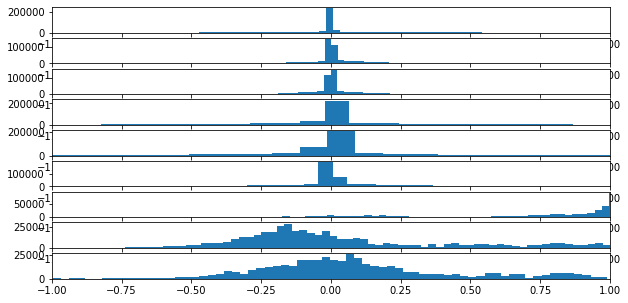

In [0]:
def plot_variable_distributions(trainX):
    """ Plots a histogram of each variable in the data set """
    # remove overlap
    cut = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    plt.figure()
    xaxis = None
    for i in range(longX.shape[1]):
        ax = plt.subplot(longX.shape[1], 1, i+1, sharex=xaxis)
        ax.set_xlim(-1, 1)
        if i == 0:
            xaxis = ax
        plt.hist(longX[:, i], bins=100)
    plt.show()

    
# Plot a histogram of each signal
plot_variable_distributions(X_train)

#### Plot the distribution of the labels

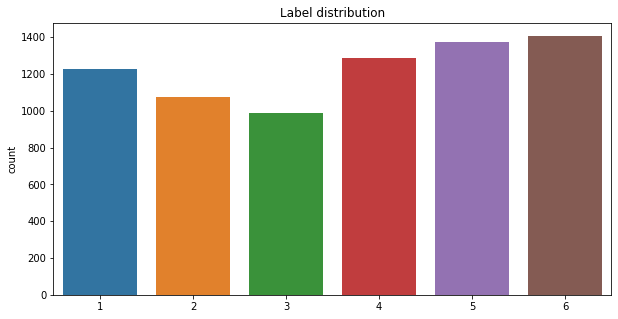

In [0]:
# Count plot of the target labels
sns.countplot(y_train, )
plt.title("Label distribution")
plt.show()


<br/>

## Feature extraction + Classifier
<br/>

Code implementation:
> **feature_extraction.py**


One of the most commonly used methods for signal classification consist on, instead of passing directly the signal to the model, extract features from the signal and pass those signals to a classifier model. The signals that I have extracted are:

* **FFT :**  The coordinates in axis x and y of the n first significant peaks of the signal in the frequency domain after applying the Fast Fourier Transform.
* **PSD :**  First n significant peaks from the Power Spectral Density analysis of the signal.
* **Autocorrelation :**  First n significant peaks of the auto-correlation coefficients.
* **Entropy (Shannon)**
* **Zero crossing rate**
* **Mean crossing rate**
* **Statistic features :**  (n5, n25, n75, n95, median, mean, std, var, rms)

Many more features can be extracted, the ones shown here are just a representation of the most commonly used. Domain-knowledge of the signals we want to classify is important in order to know which features we should extract for a better classification.
All the features are passed as a sigle vector to the classifier. The results are shown below.

In [3]:
import feature_extraction

# Run experiment:each experiments is repeated n times and the average
# and standard deviation of the results is calculated
feature_extraction.run_experiment(repeats=10)

----------------------------------------
Average score: 91.483% (+/-0.000)
Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 

----------------------------------------
Average score: 93.858% (+/-0.000)
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 Logisti

<br/>

## Automated Feature Extraction + Classifier

Code implementation:
> automated_feature_extraction/extract_features.py<br/>
> automated_feature_extraction/select_features.py<br/>
> automated_feature_extraction/train_and_evaluate.py<br/>

Another way of extracting features is using a package like tfresh (https://tsfresh.readthedocs.io/), which can be used to extract automatically a very large number of features (over 700 hundred features). Besides extracting the features, it can also be used for feature selection.
The drawback is the computational time that it takes to extract all the features. It over 2 hours on my laptop (i7, 16Gb RAM).
> $ pip install tfresh

As the signals have 9 components, I have done the extraction and selection independently for each component and then concatenated all the features together before fitting the model.

The total number of features extracted from each signal was is 6786, from which 1793 were selected.


In [8]:
from auto_feature_extraction import extract_features, select_features, train_and_evaluate

In [1]:
extract_features.extract()

In [0]:
select_features.select()

loading signal_comp_0.csv


selecting features...
selected 203 features.
loading signal_comp_1.csv


selecting features...
selected 166 features.
loading signal_comp_2.csv


selecting features...
selected 184 features.
loading signal_comp_3.csv


selecting features...
selected 154 features.
loading signal_comp_4.csv


selecting features...
selected 178 features.
loading signal_comp_5.csv


selecting features...
selected 177 features.
loading signal_comp_6.csv


selecting features...
selected 261 features.
loading signal_comp_7.csv


selecting features...
selected 234 features.
loading signal_comp_8.csv


selecting features...
selected 236 features.
saving automatic_feature_extraction/data_selected/train.csv
saving automatic_feature_extraction/data_selected/test.csv


In [9]:
train_and_evaluate.train_evaluate()

Accuracy: 87.34% 

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


Accuracy: 87.45% 

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=30, class_weight=None, dual=False,
                                    fit_intercept=True, interce

The accuracies are a bit lower than in the previous example where the features where specifically selected and extracted. Definitely it isn't worth the amount of time that it took to extract them. Maybe with other data sets the result would be different, but what is clear is that knowing the signal you are working with and which of its features are relevant, is very important.

<br/>

## 1D_Convolutional_Network
<br/>

Code implementation:

> **1D_CNN.py**

<br/>
The next model is a 1-dimensional multi-headed convolutional network, where each head of the model reads the input time steps using a different sized kernel (3, 5, 11) allowing the model to read and interpret the sequence data at three different resolutions. The interpretations from all three heads are then concatenated within the model and interpreted by a fully connected layer before a prediction is made.

<br/>
<br/>


***

<img src="data/img_models/multihead_1D_CNN.png" />

***

<br/>

In [12]:
import CNN_1D

CNN_1D.run_experiment(repeats=10, verbose=0)

> Rep_1: 92.057
> Rep_2: 93.347
> Rep_3: 93.483
> Rep_4: 92.057
> Rep_5: 92.600
> Rep_6: 91.989
> Rep_7: 90.767
> Rep_8: 92.193
> Rep_9: 92.057
> Rep_10: 93.211
[92.05702647657841, 93.346911065852, 93.48268839103869, 92.05702647657841, 92.60013577732519, 91.98913781398507, 90.76714188730483, 92.1928038017651, 92.05702647657841, 93.2111337406653]
Score: 92.376% (+/-0.774)


The accuracy achieved is **92.674%** with a standard deviation of 0,521. The 1D_CNN does a good job at identifying the activity from the signals, and with a bit of parameter tunning it could probably be improved.

<br>

## LSTM



<br>

Code implementation:
> **LSTM.py**



Recurrent neural networks are also very popular on time-series data. Recurrent neural network (RNN) have "memory", being able of remember input from the past. Long short-term memory (LSTM) networks are one of the most useful types of RNN architecture thanks to their characteristic use of "gates" to reduce the error that would be back-propagated through time and layers otherwise.

<br>

***

<img src="data/img_models/LSTM.png" />

***

<br>

In [0]:
import LSTM

LSTM.run_experiment(repeats=5, verbose=0)

> Rep_1: 97.246
> Rep_2: 96.799
> Rep_3: 96.991
> Rep_4: 96.986
> Rep_5: 96.850
[97.24578844477534, 96.7990067517268, 96.99129260593566, 96.98563689978438, 96.84990590655039]
Score: 96.974% (+/-0.155)


The results are pretty good, **96.974% (+/-0.155)** accuracy. Even better than the the maximum accuracy achieved by feature extraction, and with the advantage that it isn't needed to expend time extracting features or have any knowledge about the signal.

<br><br>

## CNN_1D + LSTM

<br>

Code implemetation:

> **CNN_1D_LSTM.py**



This conbination can be very powerful. On this model the CNN layers of the model read subsequences of the main sequence as in blocks, extracting features and temporal patterns from each block, then allowing the LSTM to interpret the features extracted from each block. It is very useful when the sequences are to large for the LSTM to remember, as the CNN layers will "compress" the sequence.

This combination can also give very great results when the features in the signal that we want to detect are spreaded on time, and the exact position of those features isn't relevant.

<br>

***

<img src="data/img_models/CNN_1D_LSTM.png" />


<br>


==>Kernel: (3, 3)
> Rep_1: 96.911
> Rep_2: 97.613
> Rep_3: 96.934
> Rep_4: 97.635
> Rep_5: 97.251
> Rep_6: 97.318
> Rep_7: 97.103

==>Kernel: (5, 7)
> Rep_1: 97.160
> Rep_2: 97.307
> Rep_3: 97.296
> Rep_4: 97.284
> Rep_5: 97.364
> Rep_6: 97.748
> Rep_7: 97.284

==>Kernel: (11, 13)
> Rep_1: 97.850
> Rep_2: 97.149
> Rep_3: 96.911
> Rep_4: 97.499
> Rep_5: 97.183
> Rep_6: 96.956
> Rep_7: 96.877
[[96.91106677055359, 97.61257767677307, 96.93369269371033, 97.63520956039429, 97.25051522254944, 97.31837511062622, 97.1034049987793], [97.16000556945801, 97.30706214904785, 97.29578495025635, 97.28445410728455, 97.36364483833313, 97.74836897850037, 97.28445410728455], [97.85018563270569, 97.14869260787964, 96.91106677055359, 97.49941229820251, 97.18261361122131, 96.95631265640259, 96.87712788581848]] [(3, 3), (5, 7), (11, 13)]
Score: 97.268% (+/-0.273)
Kernel=(3, 3): 97.252% (+/-0.273)
Kernel=(5, 7): 97.349% (+/-0.173)
Kernel=(11, 13): 97.204% (+/-0.330)


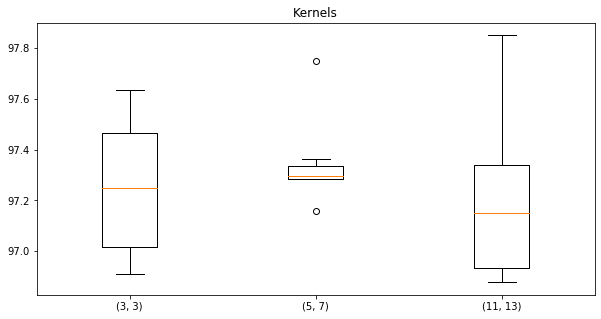

In [4]:
import CNN_1D_LSTM

# Test also using different CNN kernels
kernels = [(3, 3), (5, 7) , (11, 13)]

# Run experiment
CNN_1D_LSTM.run_experiment(repeats=7, kernel=kernels, verbose=0)

Even better, **97.34**% acucuracy. This conbination of 1D_CNN and LSTM give the best results so far. All the kernels give a similar accuracy. 

<br>

## CWT_2D_CNN


Convolution network (2D) on time/frequency representations (scalograms) extracted using the Continuous Wavelet Transform Filter Blank.

***

> CWT_scalograms.m <br>
> data_generator_classes.py <br>
> CWT_CNN_MobileNet.py <br>
> CWT_CNN_VGG16.py <br>
> CWT_3xCNN_VGG16.py <br>

***

#### Continuous Wavelet Transform Filter Bank

On this model the Continuous Wavelet Transform (CWT) is applied to each of the signal and the resulting 2-dimensional coefficient matrix (1 for each signal component) are used as input "images" to the model. The resulting input as the following shape: 224,224,9 (height, width, channels), one "channel" for each of the signal components (total_acc_x, total_acc_y, total_acc_z,body_acc_x, body_acc_y, body_acc_z, body_gyr_x, body_gyr_y, body_gyr_z).

Time/frequency analysis of the signals using the wavelet transform allows us to extract information from the signal in both, frequency and time domains. The wavelet transform filter banks it is also better than other methods as the transformation at different scales achieves the best resolution trade-off between time and frequency (high resolution in the frequency domain for small frequency values | high resolution in the time domain for for large frequency values).

I have used MATLAB and the Signal Processing Toolbox to obtain the scalograms.
The full code to obtain the scalograms is on the MATLAB file "**CWT_scalograms.m**".

<br>

<table>
    <tr>
        <td> <img src="data/data_scalograms/scalogram_example_1.png" alt="Drawing" width=450/> </td>
        <td> <img src="data/data_scalograms/scalogram_example_2.png" alt="Drawing" width=450/> </td>
    </tr>
    <tr>
        <td> <img src="data/data_scalograms/scalogram_example_3.png" width=450/> </td>
        <td> <img src="data/data_scalograms/scalogram_example_4.png" width=450/> </td>
    </tr>
</table>

<br>

#### Keras Data Generators

To feed the scalograms images to the model we also need to create a custom data_generator. Data_generators are used to load input data from the drive on small batches as needed when training the model. That way we avoid running out of RAM memory when working with large data sets. The generators used here are defined on the "**data_generator_classes.py**" file. 

More info about keras data generators:
https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly

<br>

#### MobileNet

#### Input shape 

For this model I wanted to try using transfer learning from one of the state-of-the-art pre-train models available on keras. To do that we can reuse the convolutional part of the model and remove the top. The pre-trained weights are also kept. Then we add our own dense layers on top so that they can learn to classify our specific data set. (In keras the "top" layers means the last layers of the model).

However, there is a problem. All the pre-train models (or most of them) have been trained on the "imagenet" dataset, which are RGB images (3 channels), if we want to use transfer learning and keep the pre-trained weights of the model, the maximum number of channels that we can pass as input to the model is 3. But we have 9 channels (signal components) that we need to feed to the model. 

<br>

To overcome this problem I have tried 3 possible solutions:


**1)**  Not using the pre-trained weigths of the model (no tranfer learning) and use only its architecture. In this case we need to re-train all the layers of the model.


**2)**  Concatenate the  scalograms of the 3 axis (x, y, z) of each signal together (kind of a rough solution but I have done it before and it seems to work). That way we reduce from 9 channels to just 3. This is how a single channel would look like:

<img src="data/data_scalograms/triple_scalogram_example.png" width="350"/>

<br>

**3)**  Concatenate 3 models on parallel to build a three-headed model, where each head takes a different input (3 signals/channels each head). The outputs of the 3 convolutional heads are then merged together and feeded as input to our dense layers.

<br>



<br>

#### 1. CWT_CNN_MobileNet (no transfer learning)

<br>

Code implementation:

> **CWT_CNN_MobileNet.py**

<br>

MobileNet is a very deep and yet very fast model, as it was originaly designed to be used on mobile and embedded vision applications where the computational power is limited. On this model the weights aren't pre-loaded and all layers are set to be re-trained.

<br>

<img src="data/img_models/CWT_CNN_MobileNet_horizontal.png" />

<br>

**Before call-back "ReduceLROnPlateau" added:**

In [8]:
import CWT_CNN_MobileNet

CWT_CNN_MobileNet.run_experiment(repeats=2, verbose=0) 

>Repeat_1: 64.198
>Repeat_2: 54.721
[64.1983687877655, 54.721468687057495]
Score: 59.460% (+/-4.738)


**After:**

In [7]:
import CWT_CNN_MobileNet

CWT_CNN_MobileNet.run_experiment(repeats=3, verbose=0)


Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
>Repeat_1: 73.879

Epoch 00021: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
>Repeat_2: 67.731

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
>Repeat_3: 71.365
[73.879075050354, 67.73098111152649, 71.365487575531]
Score: 70.992% (+/-2.524)


The results aren't very good, I tried other models (VGG16, ResNet, InceptionV3...), and only MobileNet achieved higher than 70% accuracy. Adding a call-back to reduce the learning rate when the accuracy stagnates seemed to help, the accuracy grew up around 10% after adding it, although more repetitions would be necessary to corroborate that, because the standard deviation is also quite high.

<br>

#### 2. CWT_CNN_VGG16 (concatenating 3 scalograms on 1 channel)

<br>

Code implementation:

> **CWT_CNN_VGG16.py**

<br>

<img src="data/img_models/CWT_CNN_VGG16_horizontal.png" />

<br>

In [4]:
import CWT_CNN_VGG16

CWT_CNN_VGG16.run_experiment(repeats=2, verbose=0)

Using TensorFlow backend.


> Rep_1: 55.571
> Rep_2: 55.027
[55.57065010070801, 55.027174949645996]
Score: 55.299% (+/-0.272)


<br>

#### 3. CWT_3xCNN_VGG16

<br>

Code implementation:

> CWT_3xCNN_VGG16.py

<br>

<br>

<img src="data/img_models/CWT_3xCNN_VGG16.png" />

<br>



In [6]:
import CWT_3xCNN_VGG16

CWT_3xCNN_VGG16.run_experiment(repeats=2, verbose=0)


Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
> Rep_1: 16.644

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 00015: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
> Rep_2: 18.037
[16.644021739130434, 18.036684782608695]
Score: 17.340% (+/-0.696)


The results of this model are the worst ones, it doesn't seem to learn anything at all. Probably the complexity of the model is excessive. Besides the models shown on this notebook I also tried with more simple models that I built myself, but the results from the scalograms weren't great either.

<br>

## Wavelet Time Scattering + Classifier

<br>

Code implementation:

> **wavelet_scattering.m**

<br>



Wavelet time scattering consist on using wavelets transforms to extract low-variance features from signal, time series or image data. Wavelet time scattering yields signal representations insensitive to shifts in the input signal without sacrificing class discriminability.

To extract the scattering features, I have used MATLAB and the Signal Processing Toolbox. The full code is on the MATLAB file "**wavelet_scattering.m**".

On of the advantages of using wavelet time scattering is its relative high speed and computational efficiency. On my laptop it took less than **4** seconds to extract all of the 1944 features of each signal that are going to be used for the classification.

From each signal component, with the wavelet decomposition framework that was used in MATLAB, we obtain 27 features on 8 different time windows *(see on the wavelet_scattering.m script)*. 

**27** features **&#215; 8** Nwin **&#215; 9** sign_comp  **=**  **1944** total features 

When can join all the features together or classify each time window independently and then apply majority vote to get the final results. I have put an example using majority vote on the wavelet_scattering.m script. Here for simplicity I am just going to add all the time window features together on a single vector. The accuracy of both methods is almost the same.

<br>



In [3]:
from scipy.io import loadmat
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score as accuracy
from sklearn.neural_network import MLPClassifier


def evaluate_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)
    score = acc * 100.0
    return score


def run_experiment(repeats=2):
    # Load data
    data_dir = 'data/wavelet_scattering/'
    train_features = 'train_WTS_features.mat'
    test_file = 'test_WTS_features.mat'

    X_train = loadmat(data_dir + 'train_WTS_features.mat')['all_features_train']
    X_test = loadmat(data_dir + 'test_WTS_features.mat')['all_features_test']
    y_train = loadmat(data_dir + 'train_WTS_labels.mat')['sequence_labels_train'][1, :]
    y_test = loadmat(data_dir + 'test_WTS_labels.mat')['sequence_labels_test'][1, :]

    time_windows = 8

    # Concatenate all the time window features together
    train_shape = (X_train.shape[0] // time_windows, X_train.shape[1] * time_windows)
    test_shape = (X_test.shape[0] // time_windows, X_test.shape[1] * time_windows)

    X_train = np.reshape(X_train, train_shape)
    X_test = np.reshape(X_test, test_shape)

    # Shuffle data
    index = [i for i in range(len(X_train))]
    np.random.shuffle(index)
    X_train = X_train[index]
    y_train = y_train[index]

    # Models
    classifiers = [
        make_pipeline(MinMaxScaler(), LogisticRegression()),
        make_pipeline(StandardScaler(), LogisticRegression(C=30)),
        make_pipeline(StandardScaler(), SVC(kernel='rbf')),
        make_pipeline(MinMaxScaler(), KNeighborsClassifier()),
        RandomForestClassifier(n_estimators=1000, n_jobs=-1),
        make_pipeline(MinMaxScaler(), MLPClassifier(hidden_layer_sizes=(150, 100)))
    ]

    all_scores = list()
    for clf in classifiers:
        score = evaluate_model(clf, X_train, y_train, X_test, y_test)
        print("-"*60)
        print(f"Score: {score}")
        print(f"{clf}\n")
        


run_experiment()

------------------------------------------------------------
Score: 89.82015609093995
Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

------------------------------------------------------------
Score: 92.29725144214456
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
   

<br>

## Conclusion

Every data set is different, but on this specific data set LSTM and 1D_CNN_LSTM are the models that best performed, achieving an accuracy significally higher than the rest of the models.

I didn't want to focus on the computational time of each model on this comparison, but the Wavelet Time Scattering technique was by far the fastest one, concadenating the WTS with a fast classifier it could take less than 15 seconds to train the model and make a prediction. 1D-CNN is also very fast, the LSTM and 2D-CNN models I had to run most of them on the cloud, while the 1D-CNN models I was able to run them on my laptop on a reasonable amount of time. 

On the other hand, the classification using the time/frequency representation of the signals (scalograms) did not achieved good results.

<br>